In [19]:
import os

import pandas as pd
import matplotlib.pyplot as plt


In [20]:
def plot_losses(baseline_info_df, shift_info_df, baseline_label, shift_label,
                title='DDPM Loss vs noise t', 
                figsize=(15, 5)):
    baseline_summary_df = baseline_info_df.describe()
    shift_summary_df = shift_info_df.describe()
    
    plt.figure(figsize=figsize)
    plt.title(title)

    # Baseline
    # =========
    plt.errorbar(
        x=baseline_summary_df.loc['mean'].index,
        y=baseline_summary_df.loc['mean'],
        yerr=baseline_summary_df.loc['std'], 
        fmt='-o',
        label=baseline_label
        )
    # Plot the mean loss over all t
    print(f'Mean loss over all t - {baseline_label}: {baseline_summary_df.loc["mean"].mean()}')
    plt.axhline(y=baseline_summary_df.loc['mean'].mean(),
            color='b', linestyle='--', label=f'mean loss - {baseline_label}')
    
    # Shift
    # =========
    plt.errorbar(
        x=shift_summary_df.loc['mean'].index,
        y=shift_summary_df.loc['mean'],
        yerr=shift_summary_df.loc['std'], 
        fmt='-o',
        label=shift_label
        )
    
    # Plot the mean loss over all t
    print(f'Mean loss over all t - {shift_label}: {shift_summary_df.loc["mean"].mean()}')
    plt.axhline(y=shift_summary_df.loc['mean'].mean(),
            color='orange', linestyle='--', label=f'mean loss - {shift_label}')


    # Display legends
    plt.legend()    
    plt.yscale('log')

    
    plt.show()
    
    

# Compare likelihood for different types of shift

## Using the GT label


### HCP_t1w - train vs HCP_t1w - val

Mean loss over all t - train: 0.017936881535641484
Mean loss over all t - val: 0.01695863761242556


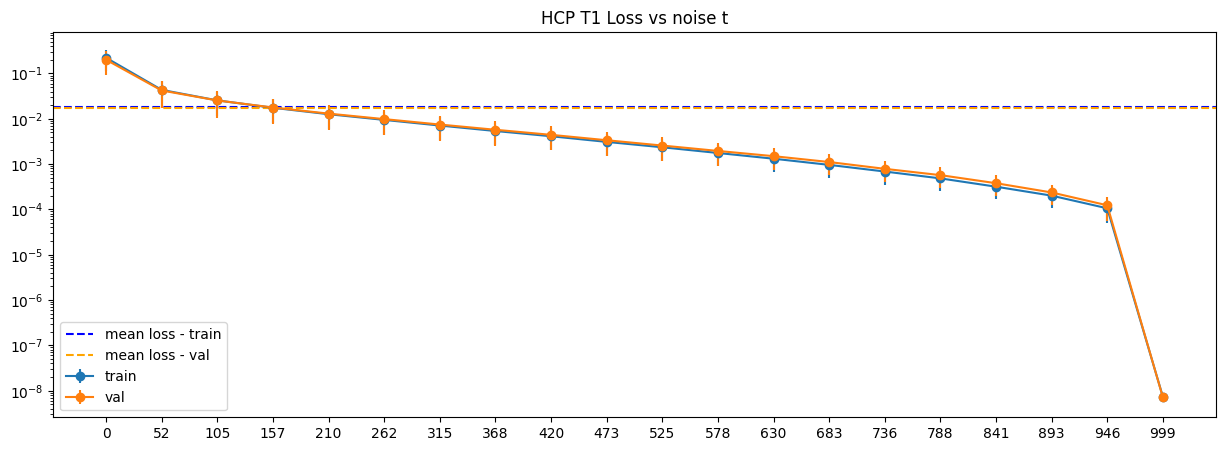

In [31]:
hcp_1_loss_df_train = pd.read_csv('/scratch_net/biwidl319/jbermeo/results/ddpm/sanity_checks/cddpm_with_aug/cpt9/hcp_t1/train/4_ddpm_loss_multiple_t_and_imgs/hcp_t1/train/none/loss_per_t_none.csv', 
                                  index_col=0)

hcp_1_loss_df_val = pd.read_csv('/scratch_net/biwidl319/jbermeo/results/ddpm/sanity_checks/cddpm_with_aug/cpt9/hcp_t1/val/4_ddpm_loss_multiple_t_and_imgs/none/loss_per_t_none.csv',
                                index_col=0)

plot_losses(hcp_1_loss_df_train, hcp_1_loss_df_val, 'train', 'val', title='HCP T1 Loss vs noise t')


### HCP_t1w val vs HCP_t2w val

In [32]:
hcp1_loss_fp = '/scratch_net/biwidl319/jbermeo/results/ddpm/sanity_checks/cddpm_with_aug/cpt9/hcp_t1/val/4_ddpm_loss_multiple_t_and_imgs/none/loss_per_t_none.csv'
hcp1_loss_df = pd.read_csv(hcp1_loss_fp, index_col=0)

hcp_t2_loss_fp = '/scratch_net/biwidl319/jbermeo/results/ddpm/sanity_checks/cddpm_with_aug/cpt9/hcp_t2/val/4_ddpm_loss_multiple_t_and_imgs/none/loss_per_t_none.csv'
hcp2_loss_df = pd.read_csv(hcp_t2_loss_fp, index_col=0)

Mean loss over all t - hcp_t1: 0.01695863761242556
Mean loss over all t - hcp_t2: 0.044828152003974324


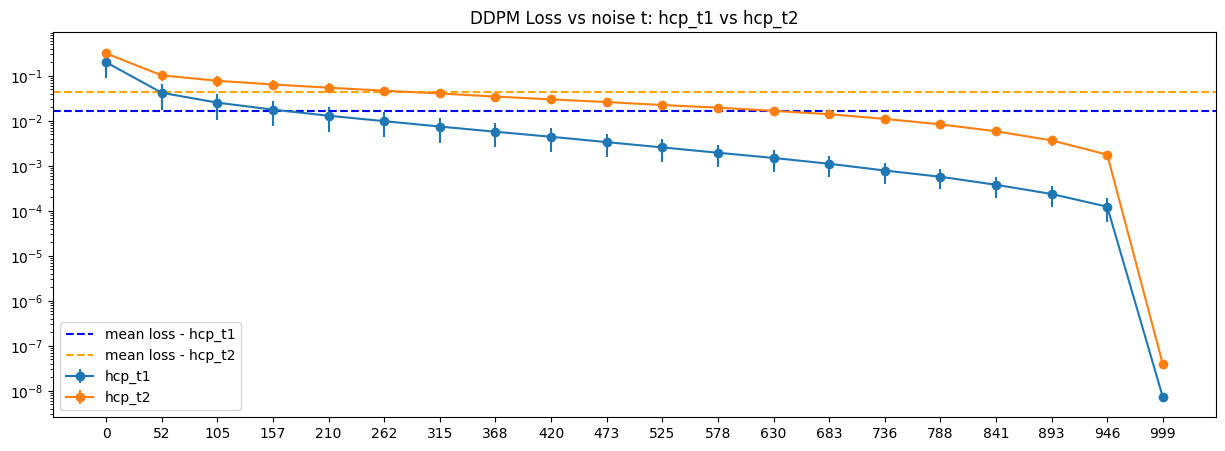

In [33]:
plot_losses(hcp1_loss_df, hcp2_loss_df, 'hcp_t1', 'hcp_t2', title='DDPM Loss vs noise t: hcp_t1 vs hcp_t2', figsize=(15, 5))

## Using very different segmentations labels from the same patient 

### HCP_t1w

In [23]:
hcp_t1_same_patient_similar_labels_fp = ''

### HCP_t2w

Mean loss over all t - hcp_t1: 0.01695863761242556
Mean loss over all t - hcp_t2 - same_patient_very_different_labels: 0.04739037203345504


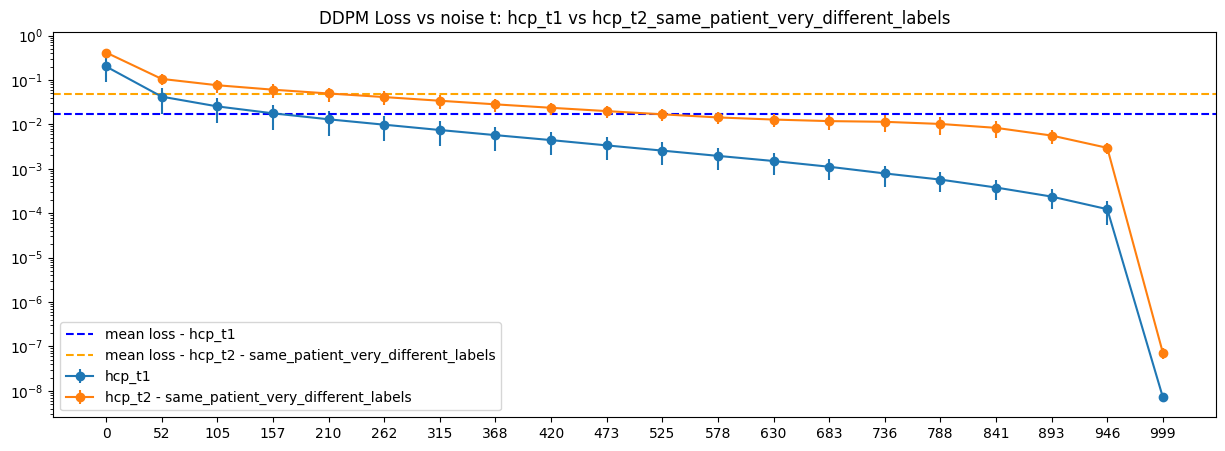

In [34]:
hcp_t2_same_patient_very_different_labels_fp = '/scratch_net/biwidl319/jbermeo/results/ddpm/sanity_checks/cddpm_with_aug/cpt9/hcp_t2/val/4_ddpm_loss_multiple_t_and_imgs/same_patient_very_different_labels/loss_per_t_same_patient_very_different_labels.csv'
hcp_t2_same_patient_very_different_labels_df = pd.read_csv(hcp_t2_same_patient_very_different_labels_fp, index_col=0)

plot_losses(hcp1_loss_df, hcp_t2_same_patient_very_different_labels_df, 
            'hcp_t1', 'hcp_t2 - same_patient_very_different_labels', title='DDPM Loss vs noise t: hcp_t1 vs hcp_t2_same_patient_very_different_labels', figsize=(15, 5))

Mean loss over all t - hcp_t2: 0.044828152003974324
Mean loss over all t - hcp_t2 - same_patient_very_different_labels: 0.04739037203345504


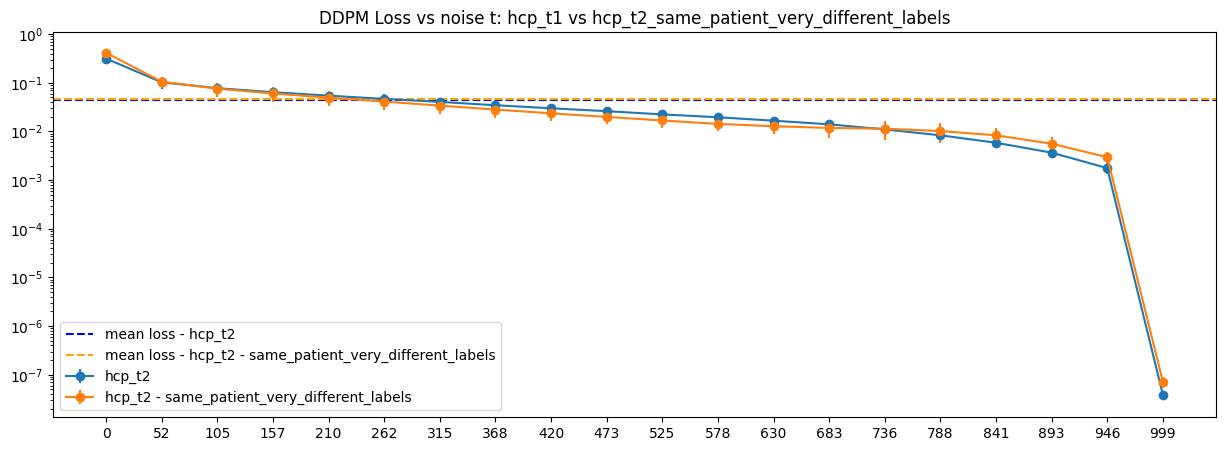

In [35]:
plot_losses(hcp2_loss_df, hcp_t2_same_patient_very_different_labels_df, 
            'hcp_t2', 'hcp_t2 - same_patient_very_different_labels', title='DDPM Loss vs noise t: hcp_t1 vs hcp_t2_same_patient_very_different_labels', figsize=(15, 5))

## Using similar segmentations labels from the same patient (dice score ~ 0.7)

### HCP_t1w

Mean loss over all t - hcp_t1: 0.01695863761242556
Mean loss over all t - hcp_t1 - same_patient_similar_labels: 0.03300092920466431


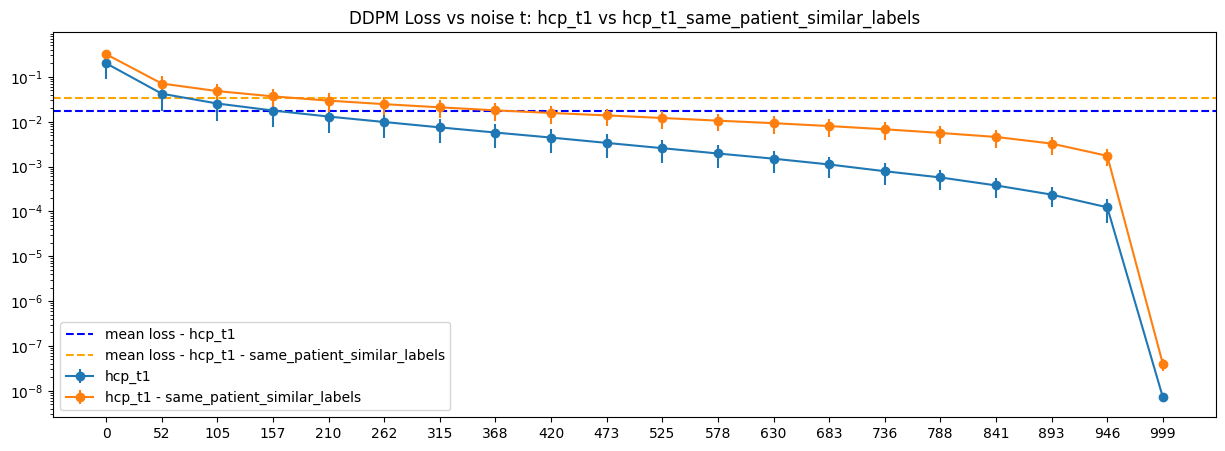

In [26]:
hcp_t1_same_patient_similar_labels_fp = '/scratch_net/biwidl319/jbermeo/results/ddpm/sanity_checks/cddpm_with_aug/cpt9/hcp_t1/val/4_ddpm_loss_multiple_t_and_imgs/same_patient_similar_labels/loss_per_t_same_patient_similar_labels.csv'
hcp_t1_same_patient_similar_labels_df = pd.read_csv(hcp_t1_same_patient_similar_labels_fp, index_col=0)

plot_losses(hcp1_loss_df, hcp_t1_same_patient_similar_labels_df,
            'hcp_t1', 'hcp_t1 - same_patient_similar_labels', title='DDPM Loss vs noise t: hcp_t1 vs hcp_t1_same_patient_similar_labels', figsize=(15, 5))

### HCP_t2w

Mean loss over all t - hcp_t1: 0.01695863761242556
Mean loss over all t - hcp_t2 - same_patient_similar_labels: 0.04228316180493226


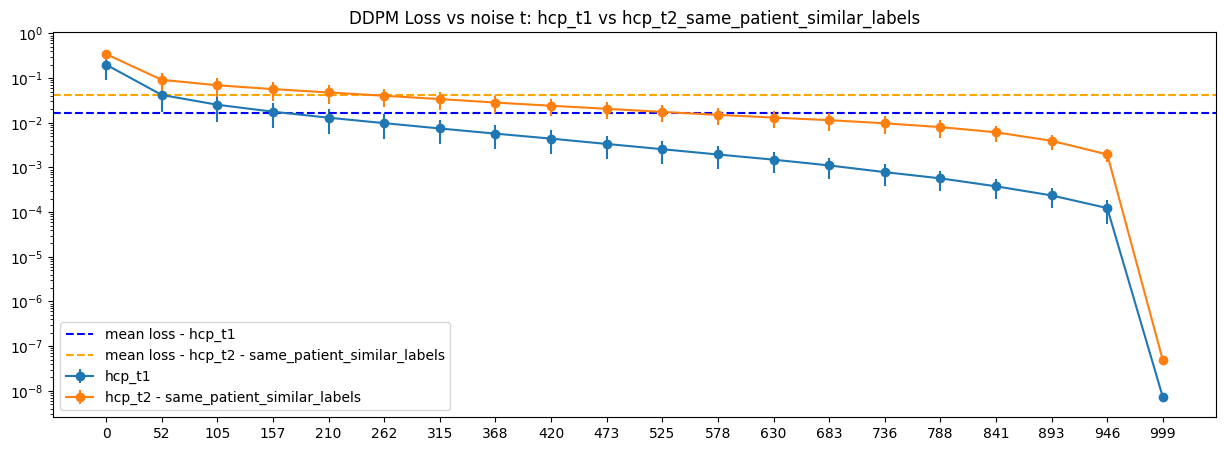

In [27]:
hcp_t2_same_patient_similar_labels_fp = '/scratch_net/biwidl319/jbermeo/results/ddpm/sanity_checks/cddpm_with_aug/cpt9/hcp_t2/val/4_ddpm_loss_multiple_t_and_imgs/same_patient_similar_labels/loss_per_t_same_patient_similar_labels.csv'
hcp_t2_same_patient_similar_labels_df = pd.read_csv(hcp_t2_same_patient_similar_labels_fp, index_col=0)

plot_losses(hcp1_loss_df, hcp_t2_same_patient_similar_labels_df, 
            'hcp_t1', 'hcp_t2 - same_patient_similar_labels', title='DDPM Loss vs noise t: hcp_t1 vs hcp_t2_same_patient_similar_labels', figsize=(15, 5))

Mean loss over all t - hcp_t2: 0.044828152003974324
Mean loss over all t - hcp_t2 - same_patient_similar_labels: 0.04228316180493226


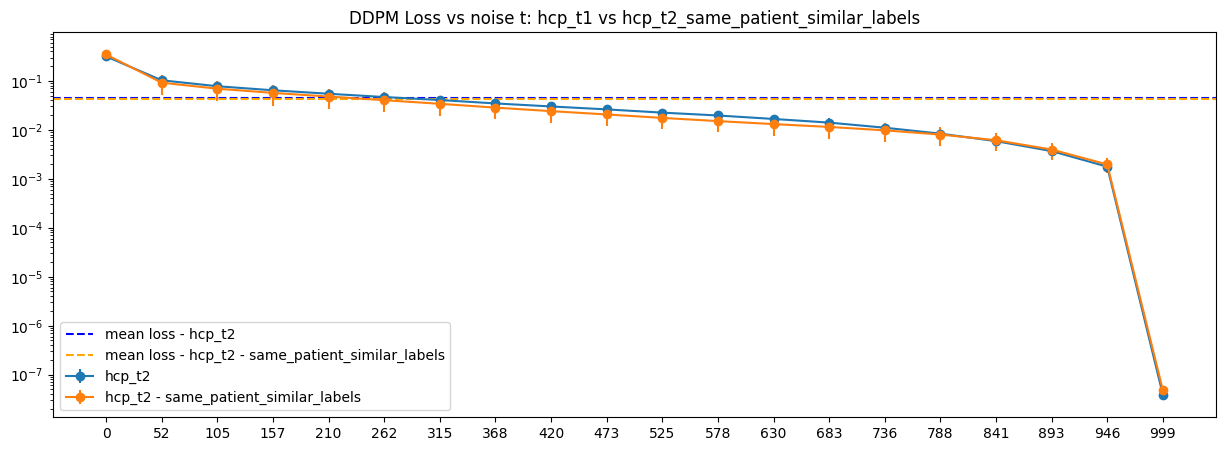

In [28]:
plot_losses(hcp2_loss_df, hcp_t2_same_patient_similar_labels_df,
            'hcp_t2', 'hcp_t2 - same_patient_similar_labels', title='DDPM Loss vs noise t: hcp_t1 vs hcp_t2_same_patient_similar_labels', figsize=(15, 5))

## Using similar segmentations from different patients (dice score ~ 0.55) 

### HCP_t1w

### HCP_t2w